<a href="https://colab.research.google.com/github/MuskanMehta-2006/Human_Pose_Estimation/blob/main/HUMAN_POSE_ESTIMATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving yoga.jpeg to yoga (1).jpeg


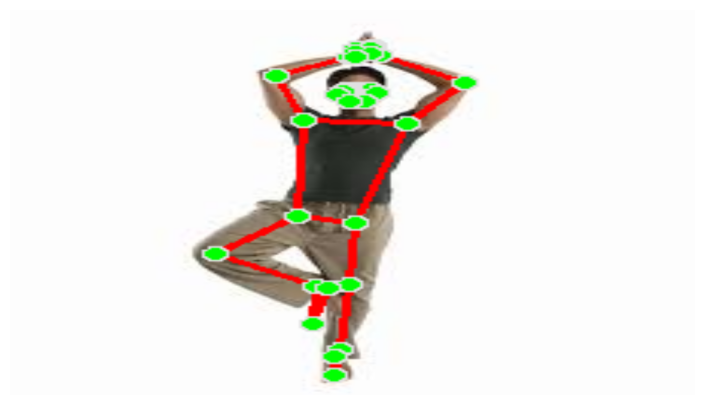

In [ ]:
from google.colab import files
import cv2
import mediapipe as mp
import subprocess
from IPython.display import Video, display
from matplotlib import pyplot as plt

# Upload the file from the local system
uploaded = files.upload()

# Get the name of the uploaded file (this assumes only one file is uploaded)
file_name = list(uploaded.keys())[0]

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Check if the uploaded file is a video or an image
is_video = file_name.endswith('.mp4') or file_name.endswith('.mov')

if is_video:
    # Open video file
    cap = cv2.VideoCapture(file_name)

    # Get the frame width, height, and frames per second (fps) of the video
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define the codec and create VideoWriter object to save the output video
    temp_output_file = 'temp_output_video.avi'  # Temporary file
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for .avi
    out = cv2.VideoWriter(temp_output_file, fourcc, fps, (frame_width, frame_height))

    # Initialize MediaPipe Pose
    with mp_pose.Pose(
        static_image_mode=False,
        model_complexity=0,
        enable_segmentation=False,
        min_detection_confidence=0.5,
    ) as pose:

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the BGR image to RGB for MediaPipe
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Process the frame with MediaPipe Pose
            results = pose.process(frame_rgb)

            # Draw landmarks on the frame
            if results.pose_landmarks:
                mp_drawing.draw_landmarks(
                    frame,
                    results.pose_landmarks,
                    mp_pose.POSE_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                    mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
                )

            # Write the frame with landmarks to the temporary output video
            out.write(frame)

    # Release resources
    cap.release()
    out.release()

    print("Video processing completed. Re-encoding for download...")

    # Use ffmpeg to re-encode the video into MP4 format for compatibility
    final_output_file = 'output_video_with_landmarks.mp4'
    subprocess.run([
        'ffmpeg', '-i', temp_output_file, '-vcodec', 'libx264', '-crf', '23', '-preset', 'fast', final_output_file
    ], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    print(f"Video saved as: {final_output_file}")

    # Provide a download link
    files.download(final_output_file)

else:
    # Handle image processing
    image = cv2.imread(file_name)

    # Convert the BGR image to RGB for MediaPipe
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image with MediaPipe Pose
    with mp_pose.Pose(
        static_image_mode=True,
        model_complexity=0,
        enable_segmentation=False,
        min_detection_confidence=0.5,
    ) as pose:
        results = pose.process(image_rgb)

        # Draw landmarks on the image
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
            )

    # Resize the processed image for display
    display_image = cv2.resize(image, (960, 540))

    # Display the processed image using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
